In this section, we will introduce (or review, for that matter) ordinary linear differential equations and how to solve them.

By the end of this section, you should be able to define the following types of differential equations and identify applicable methods in how to solve them:

* linear differential equation
* homogeneous linear differential equation
* ordinary linear differential equation
* partial differential equation
* separable differential equation
* exact differential equation

Some of these types of differential equations can be difficult, if not impossible to solve by others. Others may require numerical methods. And yet others may be unsolvable period! Determining which type you have can be the difference between many wasted hours and a successful solution.

# Separable differential equations

A first-order (involving only the first derivative, not higher order derivatives) differential equation is *separable* if it can be expressed as:

$$\frac{dy}{dx} = F(x, y)$$

If this can be written as:

$$\frac{dy}{dx} = f(x)g(y)$$

Then the solution can be found by rearranging and integrating:

$$\int{\frac{1}{g(y)} \frac{dy}{dx} dx} = \int{f(x) dx} $$

For example, take the initial value problem:

$$\frac{dy}{dx} = -\frac{x}{y-3}, y(0)=1$$

Rearranging and solving:

$$\int{y - 3 dy} = -\int{x dx} $$
$$\frac{1}{2}y^2 - 3y = -\frac{1}{2}x^2 + c$$

Plugging in y(0) = 1 gives c=-5/2:

$$y^2 - 6y = -x^2 - 5 $$

Solving using the quadratic equation gives:

$$y = \frac{-(-6) \pm \sqrt{(-6)^2 - 4(x^2 + 5)}}{2}$$ <br>

$$y = 3 - \sqrt{4-x^2} $$

Let's try plotting just for kicks:

C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


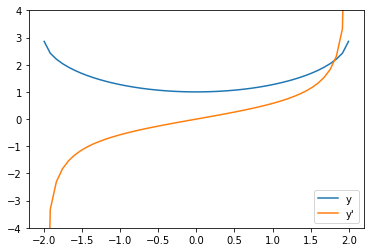

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3.99, 3.99, 101)
y = 3 - np.sqrt(4 - x**2)
yp = -x/(y-3)
fig, ax = plt.subplots()
ax.plot(x,y, label='y')
ax.plot(x,yp, label="y'")
ax.set_ylim([-4,4])
ax.legend()

Sources:

[Buders](http://www.buders.com/UNIVERSITE/Universite_Dersleri/Math202/Arsiv/separable_first_order_differential_equations.pdf)

# Exact differential equations

A differential equation is said to be exact if it can be expressed as

$$P(x, y)dx + Q(x, y)dy = 0 $$

and the following holds:

$$\frac{\partial P}{\partial y} = \frac{\partial Q}{\partial x}$$

If this is the case, then a function u(x,y) exists such that:

$$du = \frac{\partial u}{\partial x}dx + \frac{\partial u}{\partial y}dy =0$$

and 

$$\frac{\partial u}{\partial x} = P, \frac{\partial u}{\partial y} = Q $$

Solving this set of equations, one is able to find u(x,y)

For example, try:

$$2xy \frac{dy}{dx} + y^2 - 2x = 0$$

Written out in the standard form:

$$(y^2 - 2x)dx + 2xydy = 0$$

Check for exact-ness:

$$\frac{\partial P}{\partial y} = 2y = \frac{\partial Q}{\partial x} $$

This gives the system of equations:

$$\frac{\partial u}{\partial x} = y^2 - 2x $$ <br>

$$\frac{\partial u}{\partial y} = 2xy $$

Integrating gives the first equation gives:

$$u = xy^2 - x^2 + \phi(y) $$

Differentiating with respect to y gives:

$$\frac{\partial u}{\partial y} = 2xy + \phi'(y) = 2xy $$

Implying that

$$\phi = C $$

Thus

$$ xy^2 - x^2 = C $$

Let's try plotting:

Text(0,0.5,'$y$')

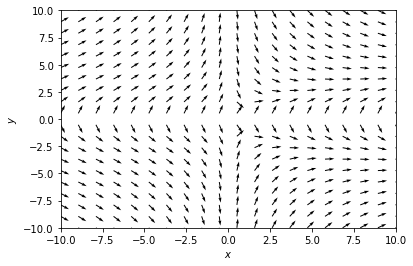

In [46]:
#Vector field
X,Y = np.meshgrid(np.linspace(-10, 10,20),np.linspace(-10,10,20))
U = 1
V = (2*X - Y**2)/(2*X*Y)
#Normalize arrows
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
fig, ax = plt.subplots()
ax.quiver(X,Y,U2,V2, color='k', linewidth=4)


plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

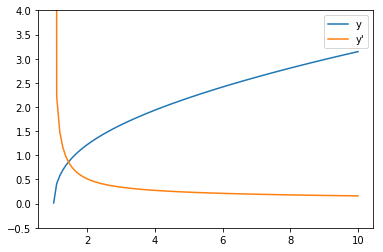

In [19]:
x = np.linspace(1.0001, 10, 101)
y = np.sqrt((x**2-1)/x)
yp = (2*x - y**2)/(2*x*y)
fig, ax = plt.subplots()
ax.plot(x,y, label='y')
ax.plot(x,yp, label="y'")
ax.set_ylim([-0.5,4])
ax.legend()

Sources:

[Salford](http://www.cse.salford.ac.uk/physics/gsmcdonald/H-Tutorials/Exact-differential-equations.pdf)

## The integrating factor

Suppose that you don't have a separable or exact differential equation. You haven't run out of options yet. If you can get your first order differential equation into the form

$$\frac{dy}{dx} + P(x)y = Q(x)$$

You can use a technique called the *integrating factor*. The integrating factor is defined as:

$$ I = e^{\int{Pdx}}$$

The integrating factor has the handy property

$$\frac{dI}{dx} = Pe^{\int{Pdx}} = IP$$

To solve, we multiply each side of the differential equation by the integrating factor:
    
$$I\frac{dy}{dx} + IP(x)y = IQ(x)$$

Integration gives:

$$\int{(I\frac{dy}{dx} + IP(x)y) dx} = \int{IQ(x)dx}$$

By the product rule, we know that

$$\frac{d}{dx}(Iy) = I\frac{dy}{dx} + IPy$$ 

This simplifies the above expression to:

$$Iy = \int{IQdx} $$

Try the following example:

$$\frac{dy}{dx} - \frac{3y}{x+1} = (x+1)^4 $$ 

The integrating factor is:

$$I = e^{\int{-\frac{3}{x+1}}dx} $$

The integral is solved as:

$$\int{-\frac{3}{x+1}}dx = -3\ln{(x+1)} = \ln{(x+1)^{-3}} $$

The integrating factor simplifies to:

$$I = \frac{1}{(x+1)^3} $$

Multiply both sides:
    
$$\frac{1}{(x+1)^3} \frac{dy}{dx} - \frac{3y}{(x+1)^4} = (x+1)$$

This simplifies to:

$$\frac{y}{(x+1)^3} = \frac{1}{2}x^2 + x + C $$ <br>

$$y = (x+1)^3(\frac{1}{2}x^2 + x + C) $$ 

Text(0,0.5,'$y$')

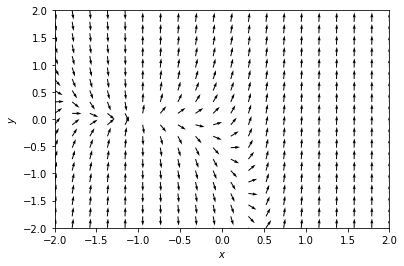

In [57]:
#Vector field
X,Y = np.meshgrid(np.linspace(-2, 2,20),np.linspace(-2,2,20))
U = 1
V = (X+1)**4 + 3*Y/(X+1)
#Normalize arrows
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
fig, ax = plt.subplots()
ax.quiver(X,Y,U2,V2, color='k', linewidth=4)


plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

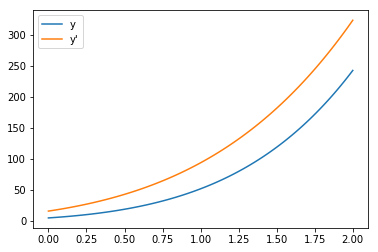

In [60]:
x = np.linspace(-0.0001, 2, 101)
y = (0.5*x**2 + x + 5)*(x+1)**3
yp = (x+1)**4 + 3*y/(x+1)
fig, ax = plt.subplots()
ax.plot(x,y, label='y')
ax.plot(x,yp, label="y'")
#ax.set_ylim([-0.5,4])
ax.legend()

Sources:

[Math Centre](http://www.mathcentre.ac.uk/resources/uploaded/mathcentre-ode.pdf)


# LaPlace Transforms

Laplace transforms are a great tool that can be used to reduce differential equations to an algebra problem. They can be very powerful and wide-reaching-- you can even solve higher order differential equations extending their application beyond first-order ODES.

What's the catch? Sometimes they aren't as elegant as other methods, and you may end up brute-forcing your way through some iffy polynomials. But once you have a few basic transforms memorized, you can can tackle quite a range of ODEs. You may be tempted to try LaPlace integrals first without checking for separability, exactness or other tricks we'll learn along the way. But if it works for you, by all means-- maybe you'll be faster.